In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# יצירת נתונים
X = np.linspace(-2 * np.pi, 2 * np.pi, 400).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(*X.shape)  # מוסיפים קצת רעש

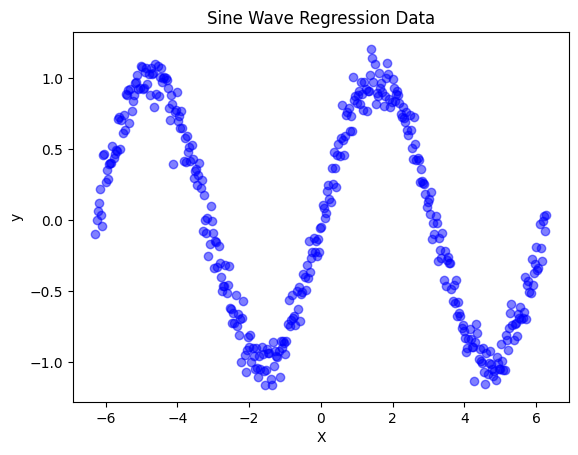

In [3]:
# use matplotlib to visualize the data
plt.scatter(X, y, color="blue", alpha=0.5)
plt.title("Sine Wave Regression Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# חלוקת הנתונים לאימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# המרת הנתונים לטנסורים
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [16]:
y.shape[1] #output
X.shape[1] #input

1

In [32]:
# # הגדרת המודל
# #נא להקפיד להגדיר גם שכבות וגם פונקציית עבודה קדימה בצורה מסודרת
# class SineWaveRegressionModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(1, 64)
#         self.tanh = nn.Tanh()
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.tanh(x)
#         x = self.fc2(x)
#         x = self.tanh(x)
#         x = self.fc3(x)
#         return x
# model = SineWaveRegressionModel()

In [5]:
model = nn.Sequential(
      nn.Linear(1, 64),
        nn.Tanh(),
        nn.Linear(64, 32),
        nn.Tanh(),
        nn.Linear(32, 1)

)

In [6]:
# פונקציית הפסד (MSE) ואופטימיזר (Adam)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# לולאת אימון המודל כולל הדפסת ההפסד כל כ 100 צעדים

epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # תחזיות ואיבוד
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # חישוב גרדיאנטים ועדכון משקלים
    loss.backward()
    optimizer.step()

    # הדפסת איבוד כל 100 אפוקים
    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 1/1000, Loss: 0.4715858995914459
Epoch 101/1000, Loss: 0.22234289348125458
Epoch 201/1000, Loss: 0.11247067153453827
Epoch 301/1000, Loss: 0.09453725814819336
Epoch 401/1000, Loss: 0.0903860405087471
Epoch 501/1000, Loss: 0.08766816556453705
Epoch 601/1000, Loss: 0.08549194037914276
Epoch 701/1000, Loss: 0.0836479589343071
Epoch 801/1000, Loss: 0.08200850337743759
Epoch 901/1000, Loss: 0.08049614727497101


In [7]:
# הערכת המודל הסופי
# העברת המודל למצב הערכה (evaluation mode)
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor) # מבצעים תחזיות על נתוני הבדיקה

# שימו לב - זו בעיית רגרסיה לכן יש לבדוק את המודל באמצעות
# חישוב RMSE
rmse = torch.sqrt(criterion(predictions, y_test_tensor))
print(f"Root Mean Squared Error (RMSE): {rmse.item():.4f}")

Root Mean Squared Error (RMSE): 0.2780


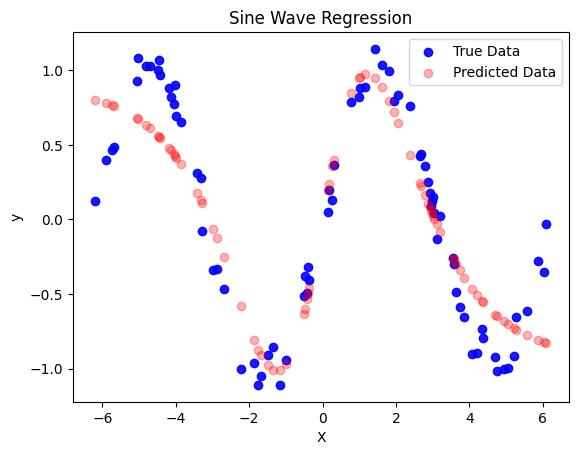

In [8]:
#אם רוצים אפשר ליצור גרף של תחזיות לעומת טנסור תויות הבדיקה
plt.scatter(X_test, y_test, color="blue", alpha=0.9, label="True Data")
plt.scatter(X_test, predictions.numpy(), color="red",
            alpha=0.3, label="Predicted Data")
plt.title("Sine Wave Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()